<a href="https://colab.research.google.com/github/viktoruebelhart/studies/blob/main/Pytorch_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0


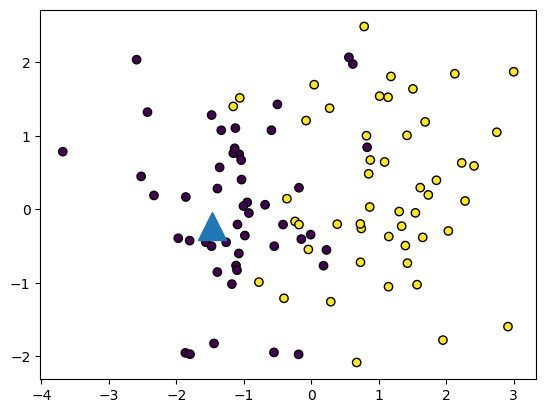

In [30]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

-4.4


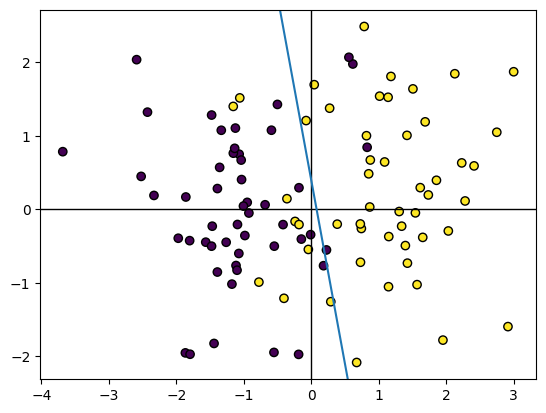

In [31]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

0 blue


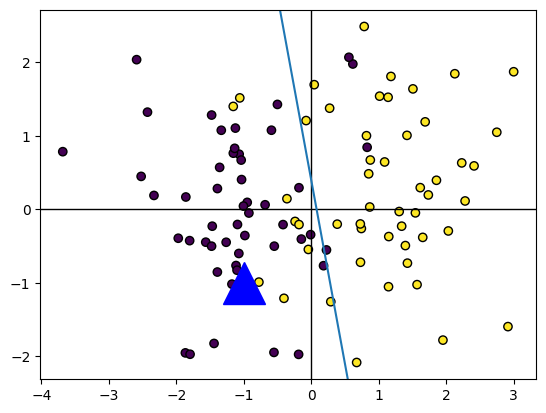

In [32]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (-1, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

In [33]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1


print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0


## Camada Linear

In [34]:
import torch
from torch import nn

In [35]:
perceptron = nn.Linear(3, 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


In [36]:
for name, tensor in perceptron.named_parameters():
  print(name, tensor.data)

weight tensor([[ 0.3031, -0.1130, -0.5643]])
bias tensor([-0.0924])


In [37]:
print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[ 0.3031, -0.1130, -0.5643]])
tensor([-0.0924])


In [38]:
w1, w2, w3 = perceptron.weight.data.tolist()[0]
b = perceptron.bias.data.tolist()[0]
print(w1, w2, w3, b)


#w1 * x1 + w2 * x2 + w3 * x3 + b = 0

0.30307644605636597 -0.11296634376049042 -0.5642716288566589 -0.0924149751663208


In [39]:
import torch
from torch import nn

perceptron = nn.Linear(2, 1)
sigmoid = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.2785, -0.5255]])
tensor([-0.2855])
tensor([[5., 1.]])
tensor([-0.4000])


In [39]:
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoid(ret)

  act_linear = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0])

  plt.plot(x[0])